# _Sleeping in Airports_ and _Skytrax_ User Review Analysis

In this notebook, we'll be doing analysis on data scraped from both [sleepinginairports.net](http://www.sleepinginairports.net/) and [airlinequality.com (Skytrax)](http://www.airlinequality.com/review-pages/a-z-airport-reviews/) to determine what makes for the best passenger experience, at least to the users who leave reviews on these types of sites.

### Getting started

Thanks to Sandeep and some tireless work copying hundreds of urls by hand by our PaXOpts team due to scraper limitations, we have available to us the Sleeping in Airports user review data (`sia`) and Skytrax user review data (`stu`) as `csv` files, so we'll start by importing them as well as a few relevant libraries and then do some preliminary exploration. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [37]:
sia = pd.read_csv('data/sia_reviews_all.csv') # user reviews scraped from sleepinginairports.net
sia.head(2)

,review_id,iata,mdy,stars,location,user,helpful,Where?,Was this an overnight stay?,Reason for Stay,...,AMENITIES,TEMPERATURES,SMOKING,BATHROOMS,OTHER GOOD TO KNOW INFORMATION,Date,pros,cons,title,review
0,13,TIA,9/9/2007,5,"TIRANA , Albania",web-administrator,---,Landside,---,---,...,---,---,---,---,---,2006 - September,---,---,Untitled1,"(Contributed by Mairead) ""Further to previous..."
1,14,TIA,9/9/2007,3,"TIRANA , Albania",web-administrator,---,Landside,---,---,...,---,---,---,---,---,2006 - August,---,---,Untitled2,"(Contributed by craig) August 2006 - ""i have j..."


As you can see, most of the data in in `String` format, which is true of the Skytrax data as well, so a preliminary glance at means and standard deviations doesn't tell us much, unfortunately.

In [41]:
sia['stars'].describe()

count    12118.000000
mean         3.065357
std          1.428504
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: stars, dtype: float64

In [4]:
stu = pd.read_csv('data/skytrax_reviews_all.csv') # user reviews scraped from airlinequality.com
stu.head(2)

,review_id,iata,page_name,date,rating,author,country,review_count,verified,images,...,food_beverages,airport_shopping,wifi_connectivity,terminal_signs,airport_staff,type_of_traveller,date_visit,experience_at_airport,title,text
0,393218,STN,London Stansted,2016-04-18,1/10,S Farabolini,Italy,0,no,0,...,1,1,1,1,1,Business,April 2016,Arrival and Departure,"""a dreadful experience""",What a dreadful experience! Long queues with r...
1,408084,KEF,Keflavik,2016-06-25,2/10,Mary Manning,United States,0,no,0,...,NaN,---,2,1,1,Family Leisure,June 2016,Arrival and Departure,"""an airport in total chaos""",This is our 2nd visit to Iceland. Previously w...


Next, we'll graph the ratings (or `stars` in `sia`) to see the distribution of user numerical ratings across all airports. 

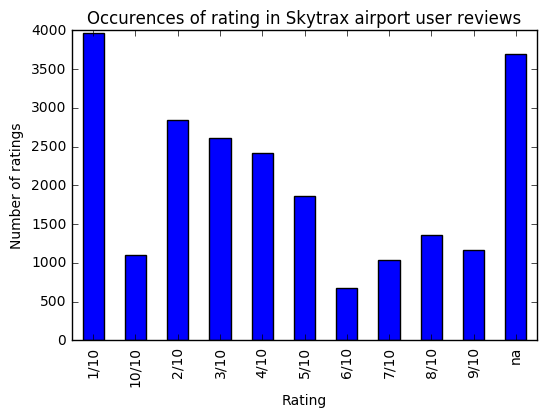

In [49]:
stu['rating'].value_counts(sort=False).sort_index().plot.bar()
plt.ylabel('Number of ratings'); plt.xlabel('Rating'); plt.title('Occurences of rating in Skytrax airport user reviews')
plt.show()

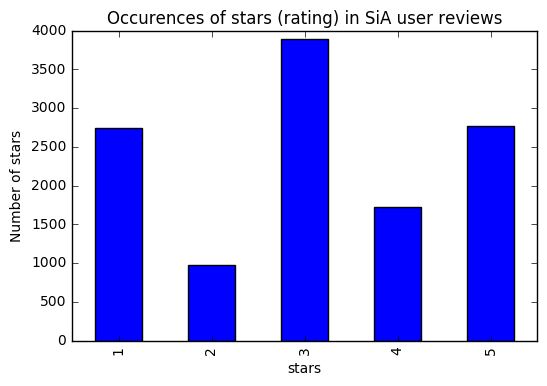

In [51]:
sia['stars'].value_counts().sort_index().plot.bar()
plt.ylabel('Number of stars'); plt.xlabel('stars'); plt.title('Occurences of stars (rating) in SiA user reviews')
plt.show()